### Import data

In [2]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data from the path
pop, g2, g1, g2_0, g1_0 = get_data("..//data//lap.csv", "..//data//lap_pop.csv"); # in which:
# pop: population data
# g1, g2: g1 and g2 data
# initial: initial number of cells in g1 and in g2 at time 0

# This is to load the estimated parameters to be used as "initial guess"
param_lap_dde = CSV.read("..//data//params_lap_DDE.csv")

# initial guesses for the parameters
lap = convert(Matrix, param_lap_dde[1:7,2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/dde/std/DrugResponseModel.jl/src/importData.jl:30


### Estimate 

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 70.66 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 141.54
Function evals per second = 142.89
Improvements/step = 0.15220
Total function evaluations = 10097


Best candidate found: [-3.70525, -3.20045, 3.27377, 2.88726, -6.07128, -4.9857]

Fitness: 307.459010080



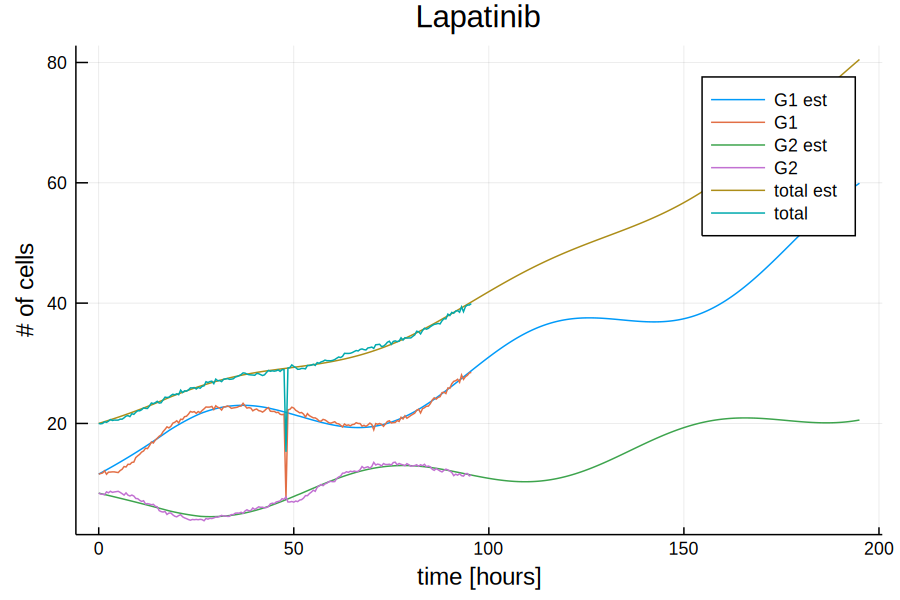

In [7]:
# i is the number of the column we are using from the data (# of trial)
i = 6

# initial guess
p = [0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001]

# lower and upper bound set for parameters
lower_bnd = [-6.0, -6.0, 2.0, 2.0, -10.0, -10.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]
bound = collect(zip(lower_bnd, upper_bnd))

# Estimating the parameters for trial i
params = optimization(g1, g2, g1_0, g2_0, p, i, bound)

# Plotting the long-term prediction along with the data for trial i
plotIt(params, g1, g2, g1_0, g2_0, pop, i, "Lapatinib")